# Let's learn abc by reading the music21 code and corpus

I realized I ought to learn abc notation since it's a standard notation supported by
music21 (tinyNotation seems fine, but it's a music21-specific thing and less powerful).

So, let's see what I can learn just by going through examples and code from the music21
github repo!

In [3]:
%run music21_docs_helpers.py
initialize_music21()

{'directoryScratch': None,
 'lilypondPath': PosixPath('/nix/store/y017wa4qn8dyjd2sjq6q4rldr2yy8mrc-lilypond-2.24.2/bin/lilypond'),
 'lilypondVersion': '2.24.2',
 'lilypondFormat': 'pdf',
 'lilypondBackend': 'ps',
 'musicxmlPath': PosixPath('/nix/store/b8pajm2klsq44al4500b5ycg2q9hrrr3-musescore-4.1.1/Applications/mscore.app'),
 'midiPath': PosixPath('/Applications/GarageBand.app'),
 'graphicsPath': PosixPath('/System/Applications/Preview.app'),
 'vectorPath': PosixPath('/System/Applications/Preview.app'),
 'pdfPath': PosixPath('/System/Applications/Preview.app'),
 'braillePath': None,
 'musescoreDirectPNGPath': PosixPath('/nix/store/b8pajm2klsq44al4500b5ycg2q9hrrr3-musescore-4.1.1/bin/mscore.'),
 'showFormat': 'musicxml',
 'writeFormat': 'musicxml',
 'ipythonShowFormat': 'ipython.musicxml.png',
 'autoDownload': 'ask',
 'debug': 0,
 'warnings': '1',
 'localCorpusSettings': LocalCorpusSettings([]),
 'localCorporaSettings': {},
 'manualCoreCorpusPath': None,
 'localCorpusPath': None}

In [ ]:
parse_abc("""
X:1
T:Shaw's -- Reel
R:reel
B:Ryan's Mammoth Collection
N: 386
Z: Contributed by Ray Davies,  ray:davies99.freeserve.co.uk
M:2/4
L:1/16
K:G
vDC|\
B,DGA BGDB, | CEAB .c2vDC | B,DGA BGcB | AGFE .D2vDC |
B,DGA BGDB, | CEAB .c2vDC | B,GFG ECA,B, | G,B,DG G,2:|
|:vga|\
bgfg egfg | dgBg dgBg | bgfg dgfg | eaag .a2(ga) |
bgfg egfg | dgBg dBGB | c"4"eAc BdGB | AGFA G2:|
""").show()
# What I can see here
# - X: is optional in this setting, it's an index for multiple sections / songs
# - T: R: B: N: Z: ... I think these are all score metadata and optional
# - X: not sure what this does, deleting it has no effect
# - M: explicit meter. Needed for time signature, also makes errors easier to see
# - L: the length of one "unit" in the notation. If both L *and* M missing it's an error
# - K: key signature.
#
# Bar lines are indicated by |, repeats by |: or :|
#
# notation has the form `{accents}{note}{count}`
# - in this case the accents are
#   - v for the sideways [ marker, . for a staccato marker
# - counts are relative to the L: directive, and they are
#   per note (not sticky as in tinyNotation / lily)
#   - This is actually really nice for the reel but might be
#     inconvenient in other contexts
#   - I don't think there's a way to go below 1, you can probably
#     use multiple L: directives if you need to (?)
#    
# - the note rule seems to have two parts, case and suffix:
#   - base for A-G is 4th octave
#   - base for a-g is 5th octave
#   - use suffix of `,` to lower and `'` to raise


In [ ]:
parse_abc("""
X: 1
T: SINK HIM, DODDIE -- HIGHLAND FLING
N: Can be used as a strathspey
B: Ryan's Mammoth Collection of Fiddle Tunes
R: highland fling
M: C|
L: 1/8
Z: Contributed 20080603 by John Chambers jc:jc.tzo.net
K: A
[|(vA<"4"E)(u"4"e>d) (vc<A)ukc2 | (B<=g)(g>d) (B<G) (B<d) \
| (A<"4"e)("4"e>d) (c<A)kc2 | (A<a)(g<b) (a<A)(c<"4"e) |
| (A<"4"e)("4"e>d) (c<A)kc2 |  (B<=g)(g>d) (B<G) (B<d) \
| (A<"4"e)("4"e>d) (c<A)kc2 | (A<a)(g<b) (a<A)(c<"4"e) |]
[|(a<e) (c<a) (e<a) kc2 | (B<=g)(g>d) (B<G)(B<^g) \
| (a<e) (c<a) (e<a) (c<a) | (A<a) (c<a) ("0"e<A) (c<"4"e) |
| (a<e) (f<d) ("4"e<d) kc2 | (B<=g)(g>d) (B<G) (B<d) \
| (A<"4"e)("4"e>d) (c<A)kc2 | (A<a)(g<b) (a<A)(c<"4"e) |]
""").show()
# What I learned from this:
#
# It appears that the < notation can be used to split a single
# count from an "L" section into 1/4 < 3/4; the direction the
# < points determines the split 1/4 < 3/4 vs 3/4 > 1/4
#
# I can't quite figure out what "4" means in this context, I
# tried removing it and couldn't work out the effect.
#
# The = prefix on a note will force a natural

In [ ]:
parse_abc("""
X:120
T:The Drunken Sailor
Z:Jack Campin  *  May 2000  *  http://www.campin.me.uk/
M:2/4
L:1/8
K:G
D|GG/3G/3G/3 GG/G/|Bd BG|AA/A/ AA/A/|FA FD|GG/G/    GG/G/|Bd BG|eg f/g/a/f/|g2 z:|
d|g>a   ba/g/|fa fd|e>f/  gf/e/|dg dB|c/B/c/d/ ed/c/|Bd gd|eg f/g/a/f/|g2 z:|
z|ee/e/ ee/e/|eG ce|dd/d/ dd/d/|dG cd|ee/e/    ee/e/|ef ga|ge dB      |A2 A:|
""").show()
#
# What I got from this: it appears that the notation `note/<n>` causes the note
# to use 1/nth of L:time, so that `G/3` is part of a triplet worth one L:.
#
# A plain `note/` is a pun for `note/2`, which is probably by far the most common use.

In [ ]:
parse_abc("""
X: 29
T:Wrecker's Daughter Quickstep
Z:Jack Campin  *  May 2000  *  http://www.campin.me.uk/
M:2/4
L:1/16
K:D
 a_aaz   aaaz | aaaz   aaaz | F2A2   d2de | d2c2  B2A2 |\
 bbbz   bbbz | bbbz   bbbz | b2d2   g2ga | g2f2  e2d2 |
 cccz   cccz | cccz   cccz | A2ce   a4   | A2ce  a4   |\
(f2e2)  d2f2 |(e2d2)  c2e2 | dddz   dddz | d4    z4  :|
.e2.e2 (f2e2)|.c2.c2 (d2c2)|.B2.B2 (f2e2)| c3^G  ABcd |\
.e2.e2 (f2e2)|.c2.c2 (d2c2)|.B2.B2 (f2e2)| A2z2  a4  :|
(F4     A2d2)|(F4     A2d2)|(G4     B2d2)|(F4    A2d2)|\
(E4     G2B2)|(A4     d2f2)| e2^gg  g2g2 | a2z2  a4   |
(F4     A2d2)|(F4     A2d2)|(G4     B2d2)|(F4    A2d2)|\
(E4     G2B2)|(A4     d2f2)| e2AA   B2c2 | d4    z4  |]
""").show()
# What I got from this:
#
# - You could already see this before, but () creates a slur.
# - z means rest
# - a prefix of ^ means sharp, _ means flat, = forces natural

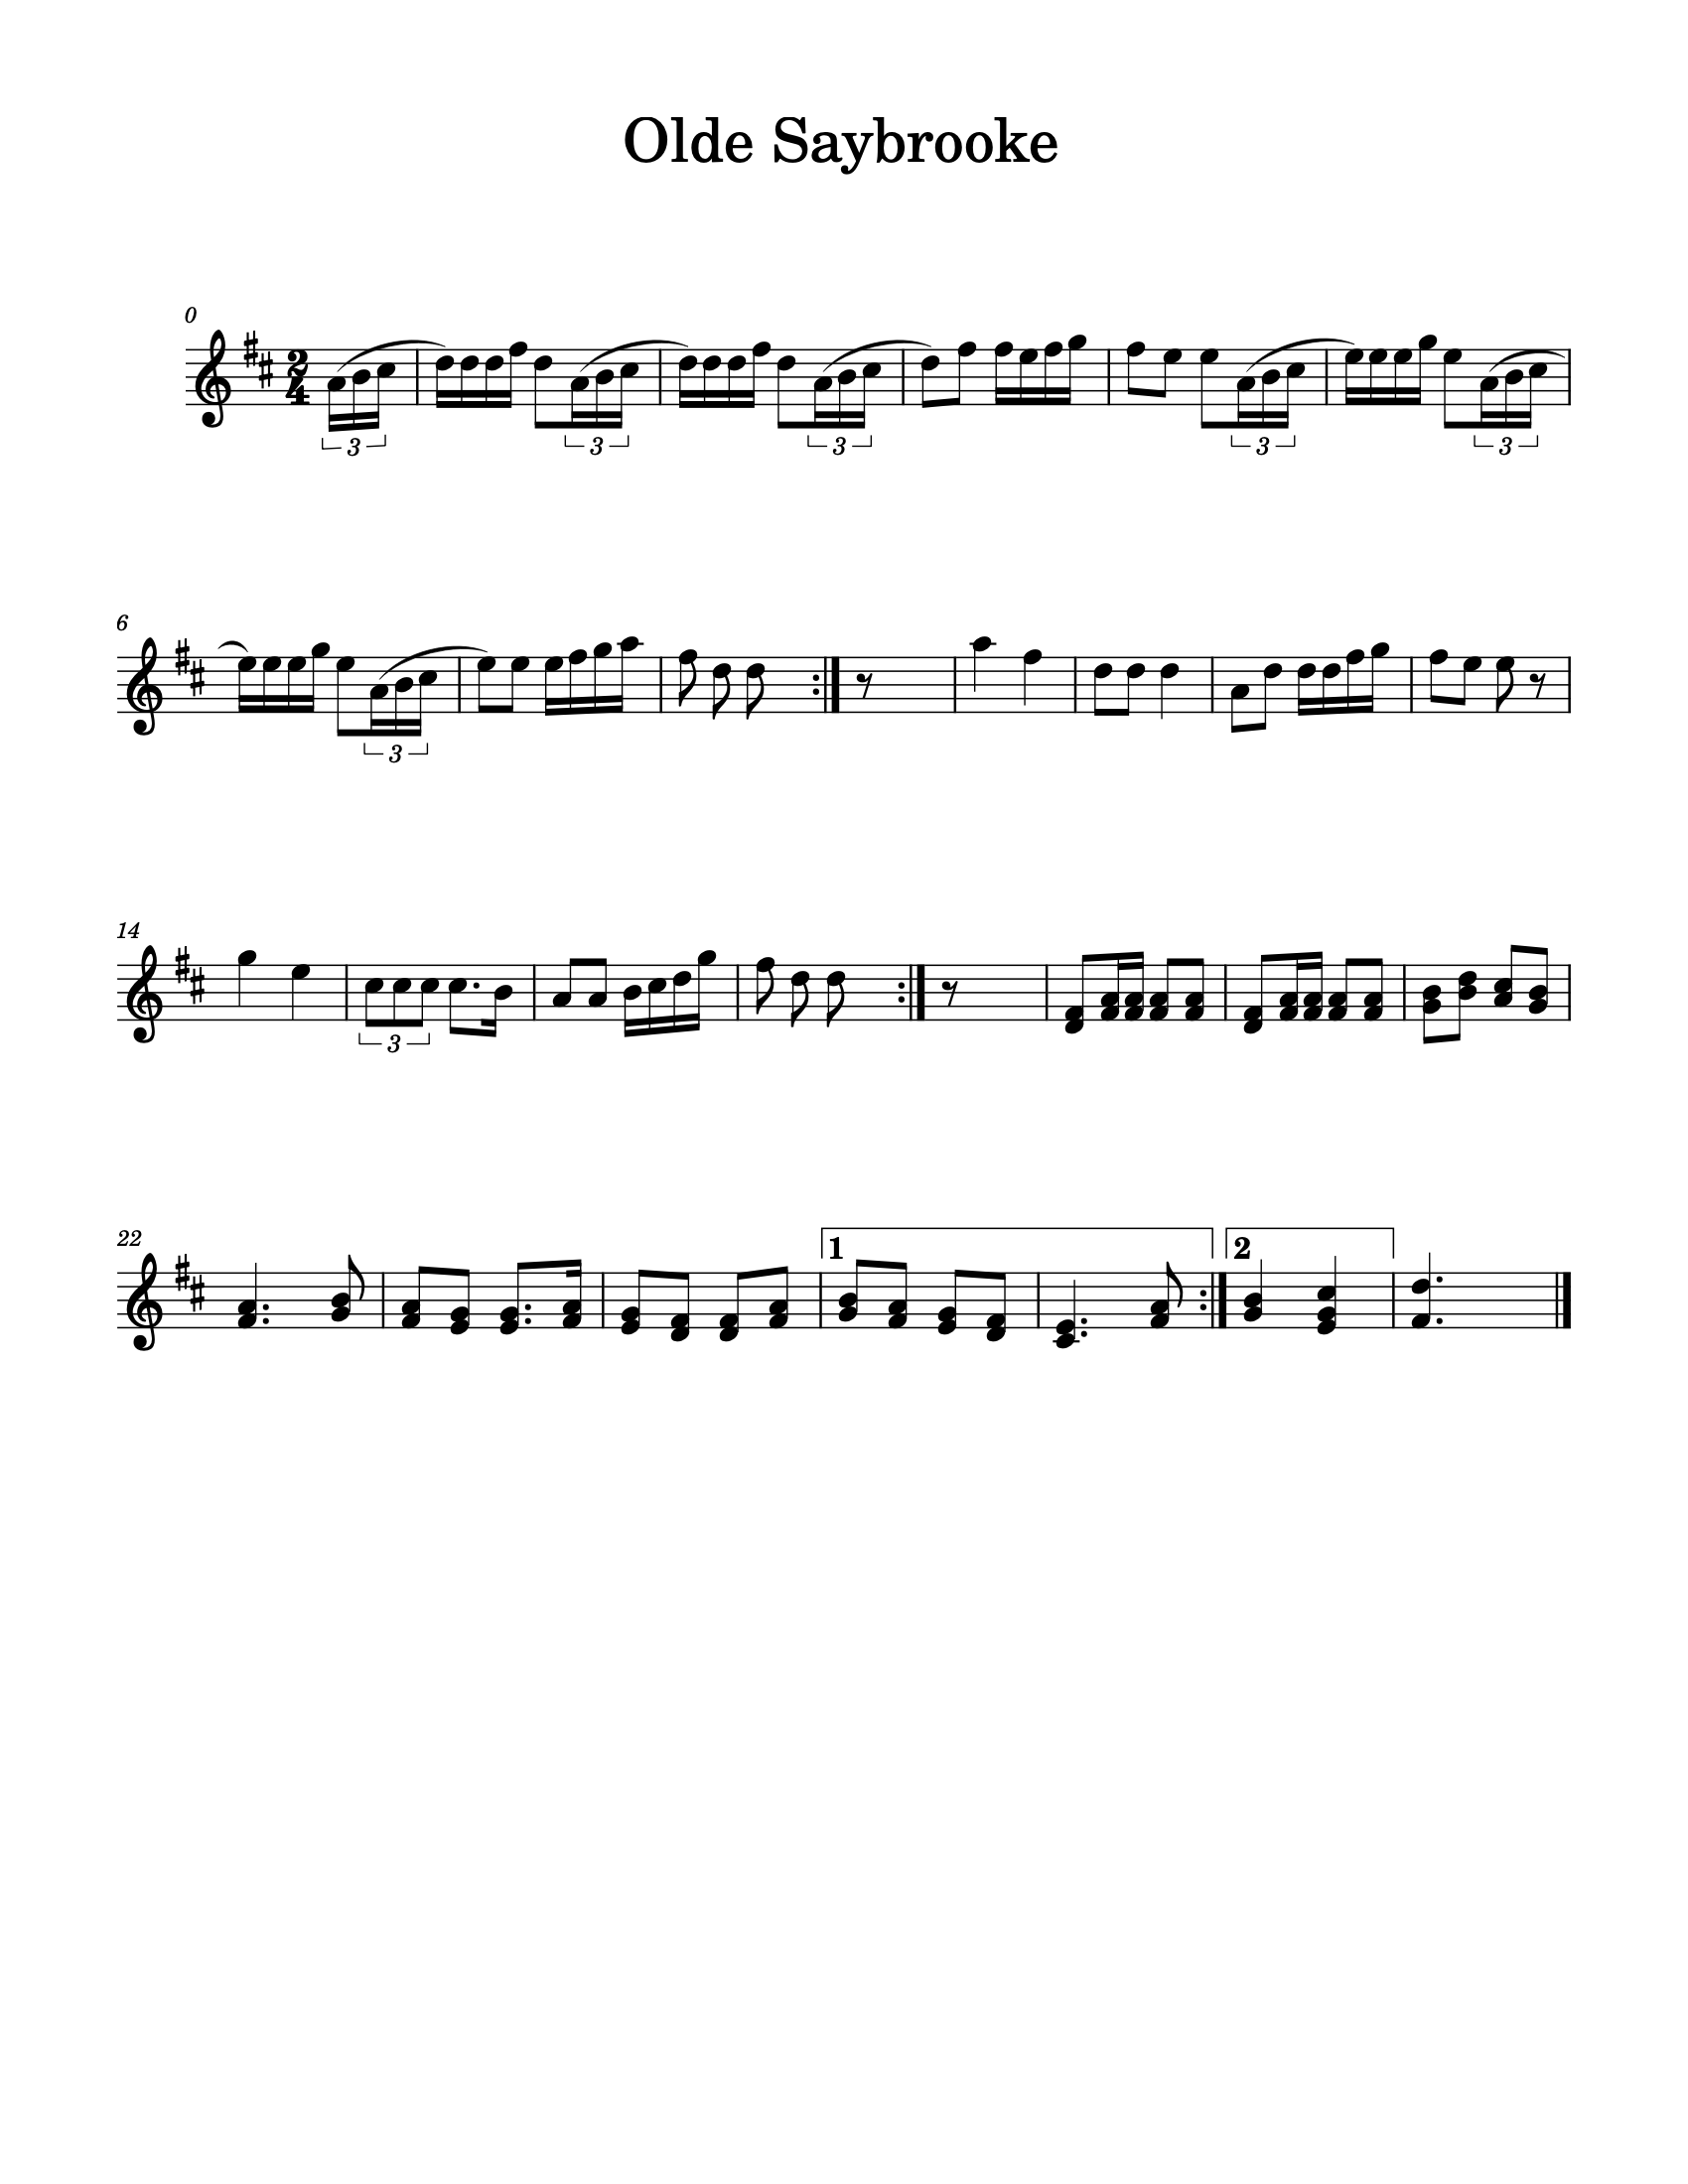

In [17]:
parse_abc("""
X:101
T:Olde Saybrooke
Z:Jack Campin  *  May 2000  *  http://www.campin.me.uk/
M:2/4
L:1/16
K:D
(3(ABc|d)ddf d2 (3(ABc|d)ddf d2(3(ABc|d2)f2 fefg|f2e2 e2
(3(ABc|e)eeg e2 (3(ABc|e)eeg e2(3(ABc|e2)e2 efga|f2d2 d2:|
z2    |a4    f4       |d2d2  d4      |A2d2  ddfg|f2e2 e2
z2    |g4    e4       |(3c2c2c2)  c3B     |A2A2  Bcdg|f2d2 d2:|
z2|[D2F2][FA][FA] [F2A2][F2A2]| [D2F2][FA][FA] [F2A2][F2A2] |\
   [G2B2][B2d2]   [A2c2][G2B2]| [F6A6]               [G2B2] |
   [F2A2][E2G2]   [E3G3] [FA] | [E2G2][D2F2]   [D2F2][F2A2] |\
[1 [G2B2][F2A2]   [E2G2][D2F2]| [C6E6]               [F2A2]:|\
[2 [G4B4]         [E4G4c4]    | [F6d6]                     |]
""").show()
#
# What I learned from this
#
# - While in general ( some notes ) means a tie, you can make
#   tuplets too, e.g. (3abc) creates a triplet of a, b, c.
#   - It doesn't seem to handle splits inside a triplet well,
#     although that may just be the music21 parser rather than abc
#     in general.
# - Use [notes] to make chords